# Library Recommender

## Import libraries and data

In [ ]:
pip install sentence-transformers gradio

In [ ]:
pip install tf-keras

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
repo_url = "https://raw.githubusercontent.com/baertsch/MGT-502-ML-Project/main/"

# Load datasets
interactions_train_df = pd.read_csv(repo_url + "kaggle_data/interactions_train.csv")
interactions_train_df.rename(columns={"u": "user_id"}, inplace=True)
#items_df = pd.read_csv(repo_url + "kaggle_data/items.csv")
items_df = pd.read_csv(repo_url + "kaggle_data/items_df.csv")
sample_submission_df = pd.read_csv(repo_url + "kaggle_data/sample_submission.csv")

#Display
display(interactions_train_df.head())
display(items_df.head())
display(sample_submission_df.head())



,user_id,i,t
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


,Title,Author,ISBN Valid,Publisher,Subjects,i,Synopsis
0,Classification décimale universelle : édition ...,['UDC Consortium (The Hague)'],9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0,NaN
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1,C'est dans l'interaction en classe que s'actua...
2,Histoire de vie et recherche biographique : pe...,"['Aneta Slowik', 'Hervé Breton', 'Gaston Pineau']",2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2,Depuis la parution en 1918 de l'ouvrage fondat...
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3,NaN
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4,"Trois histoires d'amour, un lanceur d'alerte, ..."


,user_id,recommendation
0,0,3758 11248 9088 9895 5101 6074 9295 14050 1096...
1,1,3263 726 1589 14911 6432 10897 6484 7961 8249 ...
2,2,13508 9848 12244 2742 11120 2893 2461 5439 116...
3,3,2821 10734 6357 5934 2085 12608 12539 10551 10...
4,4,12425 219 11602 1487 14178 489 13888 2110 4413...


In [3]:
items_df

,Title,Author,ISBN Valid,Publisher,Subjects,i,Synopsis
0,Classification décimale universelle : édition ...,['UDC Consortium (The Hague)'],9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0,NaN
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1,C'est dans l'interaction en classe que s'actua...
2,Histoire de vie et recherche biographique : pe...,"['Aneta Slowik', 'Hervé Breton', 'Gaston Pineau']",2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2,Depuis la parution en 1918 de l'ouvrage fondat...
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3,NaN
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4,"Trois histoires d'amour, un lanceur d'alerte, ..."
...,...,...,...,...,...,...,...
15286,Le vagabond de Tokyo /,"Fukutani, Takashi, 1952-2000",9782353480111; 235348011X; 9782353480241; 2353...,Le Lézard noir,Mangas,15286,NaN
15287,God of high school : le match contre les dieux /,"Park, Yong-Je",9782382880203; 2382880201; 9782382880210; 2382...,Kbooks,NaN,15287,NaN
15288,Blue Lock /,"Kaneshiro, Muneyuki",9782811650254; 2811650253; 9782811661274; 2811...,Pika,Compétitions; Football; Entraînement (sports);...,15288,NaN
15289,Red eyes sword : akame ga kill ! Zero /,Takahiro,9782368522134; 2368522131; 9782368522141; 2368...,Kurokawa,Bandes dessinées; Mangas,15289,Plusieurs années avant les événements de Red E...


In [4]:
n_users = interactions_train_df['user_id'].nunique()
n_items = items_df['i'].nunique()
print(f"Number of users: {n_users}")
print(f"Number of books in the library: {items_df['i'].nunique()}")

Number of users: 7838
Number of books in the library: 15291


It looks like there are __7838__ users and __15291__ books in the library.

## Split the data

In [5]:
# Sort the interactions_train_df by 'user_id' and 'timestamp'
interactions_train_df.sort_values(by=['user_id', 't'], inplace=True)
interactions_train_df['pct_rank'] = interactions_train_df.groupby('user_id')['t'].rank(pct=True, method='dense')
interactions_train_df.reset_index(drop=True, inplace=True)
interactions_train_df.head(10)

,user_id,i,t,pct_rank
0,0,0,1.680191e+09,0.04
1,0,1,1.680783e+09,0.08
2,0,2,1.680801e+09,0.12
3,0,3,1.683715e+09,0.16
4,0,3,1.683715e+09,0.20
5,0,4,1.686569e+09,0.24
6,0,5,1.687014e+09,0.28
7,0,6,1.687014e+09,0.32
8,0,7,1.687014e+09,0.36
9,0,8,1.687260e+09,0.40


In [6]:
train_data = interactions_train_df[interactions_train_df['pct_rank'] <= 0.8]
test_data = interactions_train_df[interactions_train_df['pct_rank'] > 0.8]
print("Training set size:", train_data.shape[0])
print("Test set size:", test_data.shape[0])

Training set size: 66577
Test set size: 20470


In [7]:
print(train_data[['user_id','i']].duplicated().sum())
print(test_data[['user_id','i']].duplicated().sum())

16055
2044


It seems that the some users have interacted with some items more than once.

## First model: Item-to-Item

We are going to build first a model which treats doesn't account for the frequency a user has interacted with an item.

### Create User-Item Matrices

In [8]:
def create_data_matrix1(data, n_users, n_items):
    """
    This function creates a data matrix with binary values for the interactions, 1 is interaction and 0 is no interaction.
    The data matrix is of shape (n_users, n_items). 
    """
    data_matrix = np.zeros((n_users, n_items))
    data_matrix[data['user_id'].values, data['i'].values] = 1
    return data_matrix

In [9]:
full_data_matrix = create_data_matrix1(interactions_train_df, n_users, n_items)

### Visualization of the matrices for a small portion of the data

In [10]:
def plot_interaction_heatmap1(data_matrix, n_users=50,n_items=50, title="Interaction Heatmap"):
    """
    This function plots a heatmap of the interaction data matrix.
    """
    matrix_subset = data_matrix[:n_users, :n_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap='YlGnBu', cbar=True,cbar_kws={'label': 'Interaction (1 = Positive, 0 = None)'})
    plt.title(title)
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.show()

In [11]:
train_data_matrix = create_data_matrix1(train_data, n_users, n_items)
test_data_matrix = create_data_matrix1(test_data, n_users, n_items)

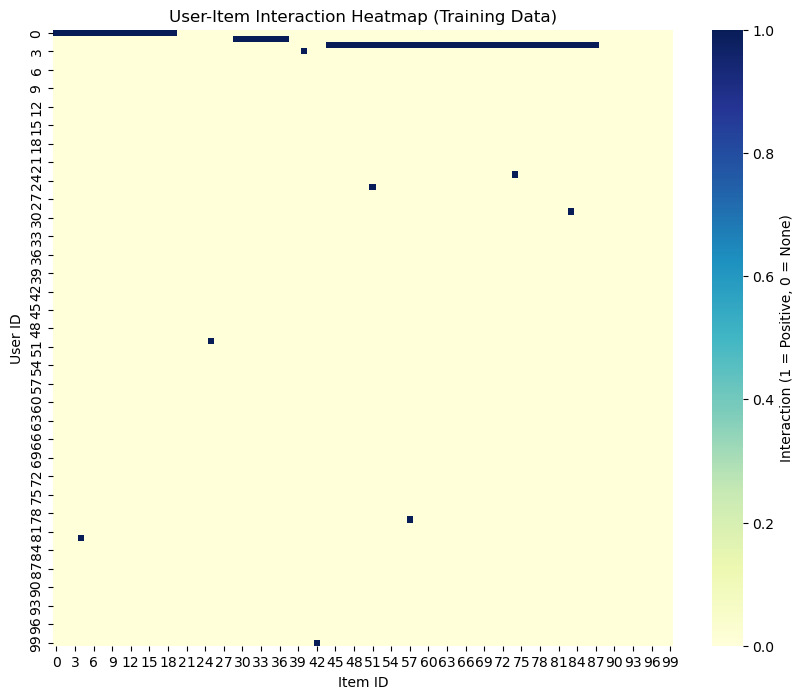

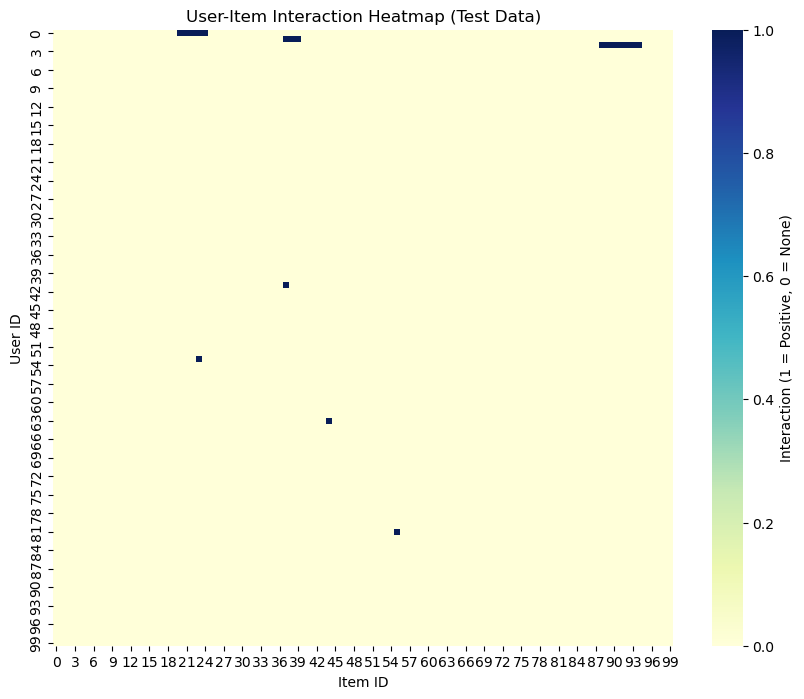

In [12]:
plot_interaction_heatmap1(train_data_matrix, n_users=100, n_items=100, title="User-Item Interaction Heatmap (Training Data)")
plot_interaction_heatmap1(test_data_matrix, n_users=100, n_items=100, title="User-Item Interaction Heatmap (Test Data)")

### Item Similarity

In [13]:
item_similarity = cosine_similarity(full_data_matrix.T)
print(item_similarity)
print("Item similarity shape:", item_similarity.shape)

[[1.         0.40824829 0.33333333 ... 0.         0.         0.        ]
 [0.40824829 1.         0.40824829 ... 0.         0.         0.        ]
 [0.33333333 0.40824829 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
Item similarity shape: (15291, 15291)


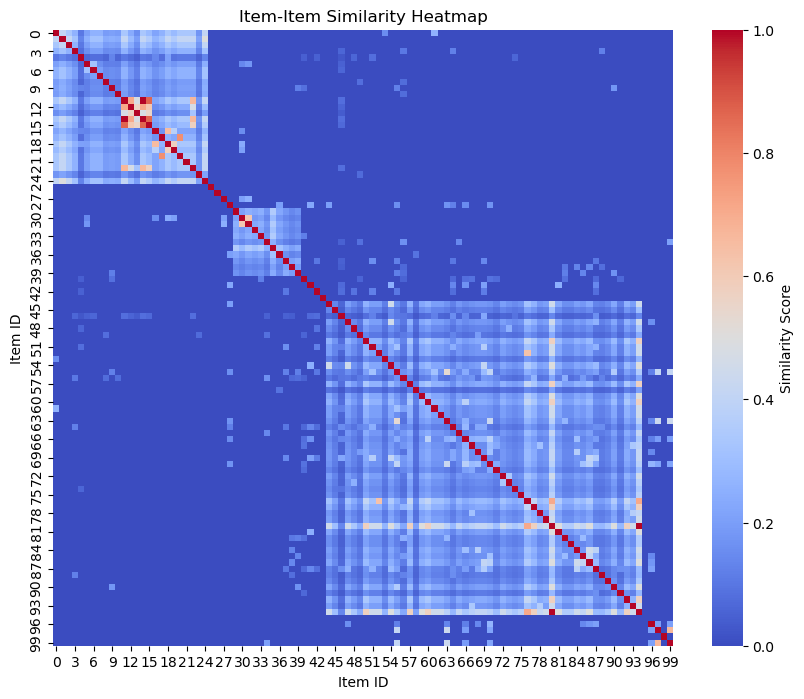

In [14]:
# Let's visualize the item similarity matrix
def plot_similarity_heatmap(matrix, n_items=50, title="Item Similarity Heatmap",x_label='X ID',y_label='y ID'):
    """
    This function plots a heatmap of the item similarity matrix.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix[:n_items, :n_items], cmap='coolwarm', cbar=True,cbar_kws={'label': 'Similarity Score'})
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
plot_similarity_heatmap(item_similarity, n_items=100, title="Item-Item Similarity Heatmap",x_label='Item ID',y_label='Item ID')

Let's look at the clusters of high similarity 

In [15]:
items_df[(items_df['i']>=11) & (items_df['i']<=15)]

,Title,Author,ISBN Valid,Publisher,Subjects,i,Synopsis
11,Rendre les élèves acteurs de leurs apprentissa...,"Béal, Yves",9782206013725; 220601372X,Delagrave,apprentissage (psychologie)--enfant; apprentis...,11,Présentation de réflexions et de remarques aut...
12,L'apprentissage par projets au secondaire : gu...,"Larmer, John",9782765033202; 276503320X,Chenelière éducation,apprentissage (psychologie)--enseignement seco...,12,NaN
13,Pour une pédagogie du projet /,"Bordalo, Isabelle",9782011709219; 2011709210,Hachette éducation,Enseignement--Méthode des projets,13,"La demande de projet est incontournable, dans ..."
14,Une classe qui coopère : pourquoi ? comment ? /,"Staquet, Christian",9782850084324; 2850084328,Chronique sociale,apprentissage (psychologie)--classe (enseignem...,14,Comment organiser les apprentissages pour que ...
15,Penser le projet : concepts et outils d'une pé...,"Tilman, Francis",2850085510; 9782850085512,Chronique sociale,pédagogie de la maîtrise,15,La pédagogie du projet est omniprésente dans l...


In [16]:
items_df[(items_df['i']>=0) & (items_df['i']<=19)][['Title','Subjects']]

,Title,Subjects
0,Classification décimale universelle : édition ...,Classification décimale universelle; Indexatio...
1,Les interactions dans l'enseignement des langu...,didactique--langue étrangère - enseignement; d...
2,Histoire de vie et recherche biographique : pe...,Histoires de vie en sociologie; Sciences socia...
3,Ce livre devrait me permettre de résoudre le c...,Moyen-Orient; Bandes dessinées autobiographiqu...
4,Les années glorieuses : roman /,France--1945-1975; Roman historique; Roman fra...
5,100 idées pour mieux gérer les troubles de l'a...,Trouble déficitaire de l'attention avec ou san...
6,La boîte à outils des formateurs : 71 outils...,Formateurs (éducation des adultes)--Formation...
7,L'autorité éducative dans la classe : douze si...,autorité--relation maître-élève; autorité--ens...
8,Un autre regard sur le climat /,Climat--Détérioration; Bandes dessinées
9,Le mirage de la croissance verte /,Développement économique--Aspect environnement...


In [17]:
# Find item pairs with similarity between 0.8 and 1
similar_items = []
threshold_min = 0.8
threshold_max = 1.0

for i in range(item_similarity.shape[0]):
    for j in range(i + 1, item_similarity.shape[1]):  # Avoid duplicate pairs and self-similarity
        if threshold_min <= item_similarity[i, j] <= threshold_max:
            similar_items.append((i, j, item_similarity[i, j]))

# Display the results
print("Item pairs with similarity between 0.8 and 1:")
for item1, item2, similarity in similar_items:
    print(f"Item {item1} and Item {item2} have similarity: {similarity}")

Item pairs with similarity between 0.8 and 1:
Item 11 and Item 15 have similarity: 0.8660254037844388
Item 14 and Item 15 have similarity: 0.8660254037844388
Item 79 and Item 7129 have similarity: 0.8944271909999159
Item 80 and Item 94 have similarity: 1.0
Item 151 and Item 11561 have similarity: 0.8660254037844388
Item 153 and Item 156 have similarity: 0.801783725737273
Item 161 and Item 166 have similarity: 0.8164965809277261
Item 299 and Item 1492 have similarity: 1.0
Item 303 and Item 307 have similarity: 1.0
Item 303 and Item 313 have similarity: 1.0
Item 303 and Item 321 have similarity: 1.0
Item 303 and Item 327 have similarity: 1.0
Item 307 and Item 313 have similarity: 1.0
Item 307 and Item 321 have similarity: 1.0
Item 307 and Item 327 have similarity: 1.0
Item 313 and Item 321 have similarity: 1.0
Item 313 and Item 327 have similarity: 1.0
Item 314 and Item 9934 have similarity: 0.8944271909999159
Item 321 and Item 327 have similarity: 1.0
Item 530 and Item 532 have similari

In [18]:
display(items_df[(items_df['i']==76)])
display(items_df[(items_df['i']==80)]) 

,Title,Author,ISBN Valid,Publisher,Subjects,i,Synopsis
76,Silver spoon = La cuillère d'argent /,"Arakawa, Hiromu, 1973-",9782351428344; 235142834X; 9782351428351; 2351...,Kurokawa,Bandes dessinées; Mangas,76,Yûgo Hachiken est un collégien qui vient du pr...


,Title,Author,ISBN Valid,Publisher,Subjects,i,Synopsis
80,Erased /,"Sanbe, Kei",9782355926990; 2355926999; 9782355927140; 2355...,Ki-oon,Mangas; Bandes dessinées,80,2006. Aspirant mangaka dont la carrière peine ...


### Prediction using User Similarity

In [19]:
def item_based_predict(matrix, similarity, epsilon = 1e-9):
    """
    This function predicts user-item interactions based on item similarity.
    Parameters:
    - matrix: The user-item interaction matrix.
    - similarity: The item-item similarity matrix.
    - epsilon: A small value to avoid division by zero.
    Returns:
    - numpy array of likelihood of interactions for each user-item pair.
    """
    pred = similarity.dot(matrix.T) / (similarity.sum(axis=1)[:, np.newaxis] + epsilon)
    return pred.T

In [20]:
item_based_predictions = item_based_predict(full_data_matrix, item_similarity)
print("Predicted Interaction Matrix using Item-to-Item Similarity")
print(item_based_predictions)
print("Predicted Interaction Matrix shape:", item_based_predictions.shape)

Predicted Interaction Matrix using Item-to-Item Similarity
[[0.50330859 0.887555   0.72071387 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.02788041 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Predicted Interaction Matrix shape: (7838, 15291)


Let's visualize again.

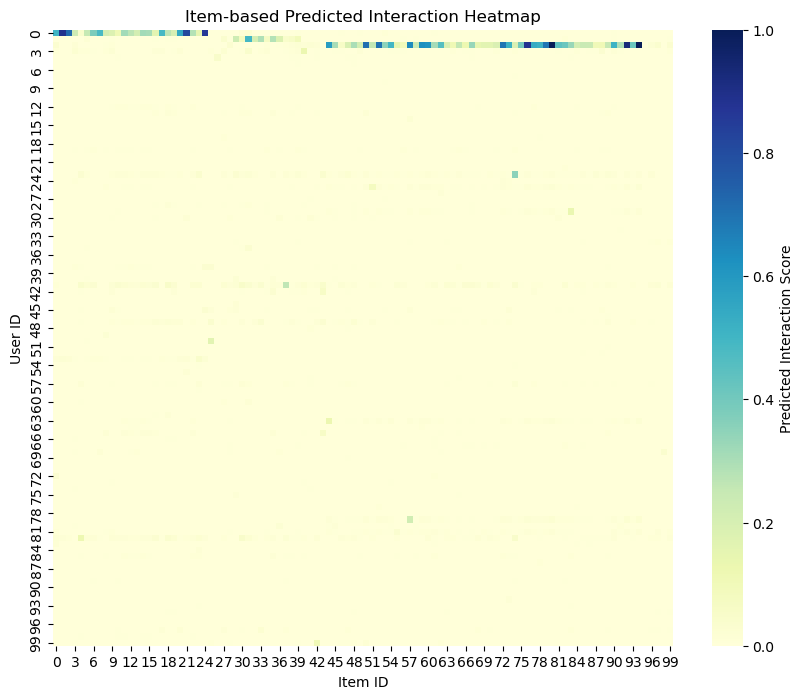

In [21]:
def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=100,num_items=100):
    matrix_subset = prediction_matrix[:num_users, :num_items]
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap='YlGnBu', cbar=True,cbar_kws={'label': 'Predicted Interaction Score'})
    plt.title(title)
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.show()

plot_interaction_prediction_heatmap(item_based_predictions, title="Item-based Predicted Interaction Heatmap")

## Model: User-to-User Collaborative Filtering with Implicit Feedback

### User Similarity Matrix

In [22]:
user_similarity = cosine_similarity(full_data_matrix)
print(user_similarity)
print("User similarity shape:", user_similarity.shape)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.08084521]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.08084521 ... 0.         0.         1.        ]]
User similarity shape: (7838, 7838)


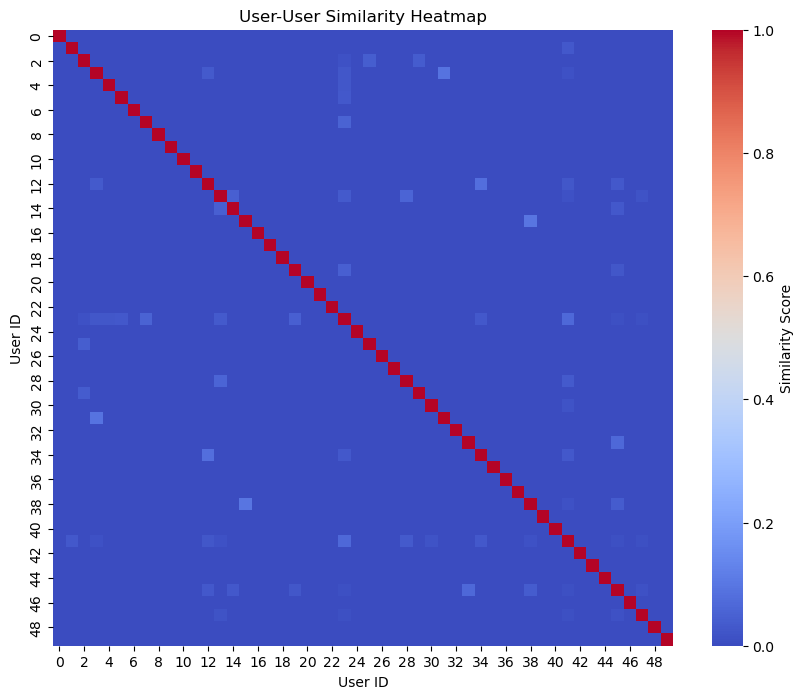

In [23]:
plot_similarity_heatmap(user_similarity, n_items=50, title="User-User Similarity Heatmap",x_label='User ID',y_label='User ID')

### Prediction using User Similarity

\begin{equation}
{p}_{u}(i) = \frac{\sum\limits_{u' \in U} \text{sim}(u, u') \cdot {R}_{u'}(i)}{\sum\limits_{u' \in U} \text{sim}(u, u')}
\end{equation}


Explanation:
*   $P_u(i)$ is the likelihood of user $u$ interacting with item $i$. This is the value we want to compute.
*   $\text{sim}(u, u')$ is the cosine similarity between users $u$ and $u'$.
*   $R_u'(i)$ is one if user $u'$ has already interacted with item $i$. Otherwise it is zero.
*   $U$ is the set of all users in the dataset.

This formula calculates the likelihood of interaction between user $ u $ and item $ i $ based on interactions of similar users with that item. The weighted sum of interactions from similar users is normalized by the sum of the similarities.

In [24]:
def user_based_predict(matrix, similarity, epsilon = 1e-9):
    """
    This function predicts user-item interactions based on user similarity.
    Parameters:
    - matrix: The user-item interaction matrix.
    - similarity: The user-user similarity matrix.
    - epsilon: A small value to avoid division by zero.
    Returns:
    - numpy array of likelihood of interactions for each user-item pair.
    """
    pred = similarity.dot(matrix) / (np.abs(similarity).sum(axis=1)[:, np.newaxis] + epsilon)
    return pred


In [25]:
user_based_predictions = user_based_predict(full_data_matrix, user_similarity)
print("Predicted Interaction Matrix using User-to-User Similarity")
print(user_based_predictions)
print("Predicted Interaction Matrix shape:", user_based_predictions.shape)

Predicted Interaction Matrix using User-to-User Similarity
[[0.12083887 0.12253831 0.12798326 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00421191 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Predicted Interaction Matrix shape: (7838, 15291)


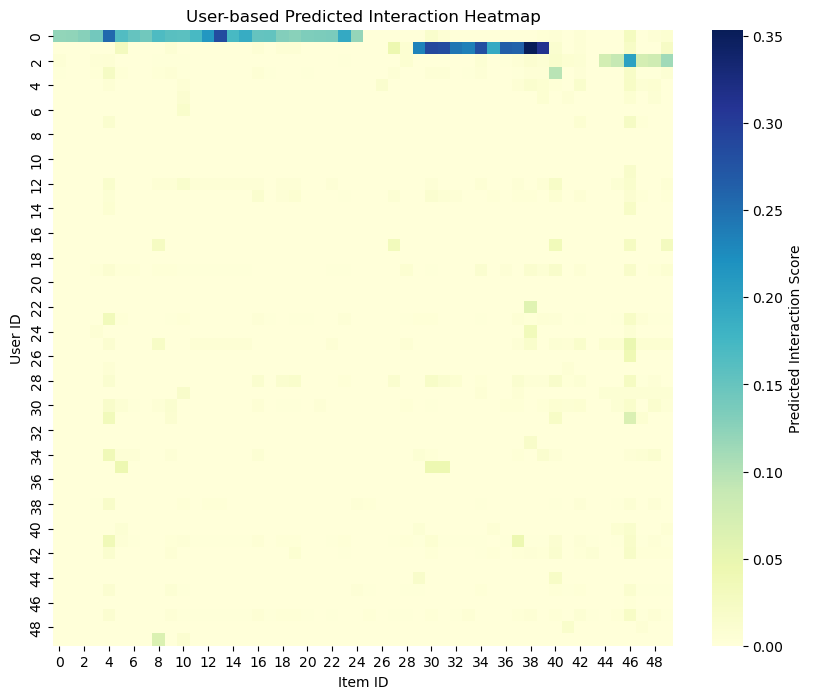

In [26]:
plot_interaction_prediction_heatmap(user_based_predictions, title="User-based Predicted Interaction Heatmap", num_users=50,num_items=50)

## Evaluation of the two recommender models

In [27]:
def precision_recall_at_k(prediction, ground_truth, k=10):
    """
    Calculates Precision@K and Recall@K for top-K recommendations.
    Parameters:
        prediction (numpy array): The predicted interaction matrix with scores.
        ground_truth (numpy array): The ground truth interaction matrix (binary).
        k (int): Number of top recommendations to consider.
    Returns:
        precision_at_k (float): The average precision@K over all users.
        recall_at_k (float): The average recall@K over all users.
    """
    num_users = prediction.shape[0]
    precision_at_k, recall_at_k,map_at_k = 0, 0, 0

    for user in range(num_users):
        # Step 1: Get the indices of the top-K items for the user based on predicted scores
        top_k_items = np.argsort(prediction[user, :])[-k:]  # Complete this line to retrieve top-K item indices for the user
        
        # Step 2: Calculate the number of relevant items in the top-K items for the user
        relevant_items_in_top_k = np.sum([ground_truth[user,i] for i in top_k_items]) 
        
        # Step 3: Calculate the total number of relevant items for the user
        total_relevant_items = ground_truth[user, :].sum()  

        # Update Precision@K and Recall@K for this user
        precision_at_k += relevant_items_in_top_k / k
        recall_at_k += relevant_items_in_top_k / total_relevant_items if total_relevant_items > 0 else 0

        avg_precision_at_k = 0
        for i in range(k):
            if ground_truth[user, top_k_items[i]] == 1:
                avg_precision_at_k += np.sum(ground_truth[user, top_k_items[:i+1]]) / (i + 1)
        map_at_k += avg_precision_at_k / k 

    # Step 4: Calculate the average Precision@K and Recall@K over all users
    precision_at_k /= num_users
    recall_at_k /= num_users
    map_at_k /= num_users
    
    return precision_at_k, recall_at_k, map_at_k

In [28]:
precision_item_k, recall_item_k, map_item_k= precision_recall_at_k(item_based_predictions, test_data_matrix, k=10)
precision_user_k, recall_user_k, map_user_k = precision_recall_at_k(user_based_predictions, test_data_matrix, k=10)


print('Item-based CF Precision@K for k=10:', precision_item_k)
print('Item-based CF Recall@K for k=10:', recall_item_k)
print('Item-based CF MAP@K for k=10:', map_item_k)
print('User-based CF Precision@K for k=10:', precision_user_k)
print('User-based CF Recall@K for k=10:', recall_user_k)
print('User-based CF MAP@K for k=10:', map_user_k)

Item-based CF Precision@K for k=10: 0.15147996937994507
Item-based CF Recall@K for k=10: 0.807978450064057
Item-based CF MAP@K for k=10: 0.044931023868252255
User-based CF Precision@K for k=10: 0.160053585098238
User-based CF Recall@K for k=10: 0.8852508120671551
User-based CF MAP@K for k=10: 0.0451472729518776


## Recommendations dataframe using the best model -> User-based model

In [29]:
def create_recommendations_csv(predictions_matrix,name='recommendations.csv'):
    user_based_recommendations = []
    for user_id in range(predictions_matrix.shape[0]):
        # Indices of the top 10 items for each user (based on predicted interactions)
        top_10_items = np.argsort(predictions_matrix[user_id])[-10:][::-1]  # Sorting them in descending order
        
        top_10_items_str = " ".join(map(str, top_10_items))
        
        # Append the user_id and the recommendations as a string
        user_based_recommendations.append([user_id, top_10_items_str])

    recommendations_df = pd.DataFrame(user_based_recommendations, columns=['user_id', 'recommendation'])
    recommendations_df.to_csv(name, index=False)
    print("Recommendations CSV created successfully.")
    return recommendations_df

In [30]:
recommendations_df = create_recommendations_csv(user_based_predictions, name='user_based_recommendations.csv')
recommendations_df.head()

Recommendations CSV created successfully.


,user_id,recommendation
0,0,13 4 12 23 15 11 14 8 5 9
1,1,38 39 30 31 34 36 37 32 33 29
2,2,46 58 49 56 53 91 64 87 45 71
3,3,149 169 163 167 128 133 143 40 139 165
4,4,203 198 207 205 195 202 193 191 199 201


## Inclusion of frequency

This one accounts the number of times the user has interacted with the item. So in the formula:

\begin{equation}
{p}_{u}(i) =  \frac{\sum\limits_{i' \in I} \text{sim}(i, i') \cdot {R}_{u}(i')}{\sum\limits_{i' \in I} \text{sim}(i, i')}
\end{equation}

$R_u(i')$ is the number of times user u interacted with item i'

In [31]:
def create_data_matrix2(data, n_users, n_items):
    """
    This function creates a data matrix with frequency values for the interactions. 
    The matrix is of shape (n_users, n_items) where each value represents the frequency of interaction.
    """
    # Initialize a matrix of zeros, where rows represent users and columns represent items
    data_matrix = np.zeros((n_users, n_items))
    
    # Add the frequency of interactions between users and items
    for _, row in data.iterrows():
        user_id = int(row['user_id'])
        item_id = int(row['i'])
        data_matrix[user_id, item_id] += 1  # Increment the count for each interaction
    
    return data_matrix

In [32]:
train_data_matrix2 = create_data_matrix2(train_data, n_users, n_items)
# Display the matrices
print("Training data matrix")
print(train_data_matrix2)
print("Number of interactions: ", np.sum(train_data_matrix2))

Training data matrix
[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Number of interactions:  66577.0


In [33]:
full_data_matrix2 = create_data_matrix2(interactions_train_df, n_users, n_items)

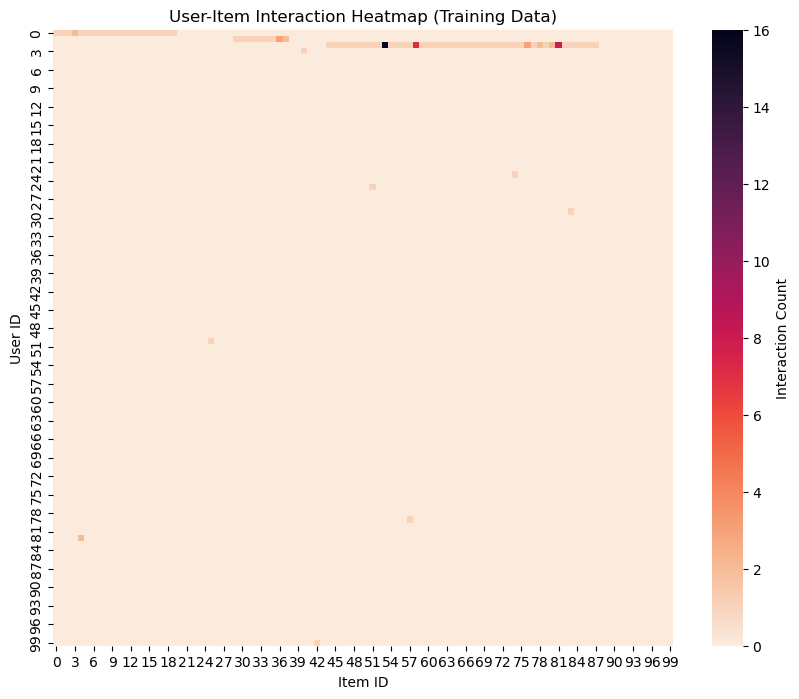

In [34]:
def plot_interaction_heatmap2(data_matrix, n_users=100,n_items=100, title="Interaction Heatmap"):
    """
    This function plots a heatmap of the interaction data matrix.
    """
    matrix_subset = data_matrix[:n_users, :n_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap='rocket_r', cbar=True,cbar_kws={'label': 'Interaction Count'})
    plt.title(title)
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.show()

plot_interaction_heatmap2(train_data_matrix2, n_users=100, n_items=100, title="User-Item Interaction Heatmap (Training Data)")

### Let's try an user-to-user collaborative filtering with implicit feedback with these matrices

In [35]:
user_similarity2 = cosine_similarity(full_data_matrix2)
print(user_similarity2)
print("User similarity shape:", user_similarity2.shape)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.02539184]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.02539184 ... 0.         0.         1.        ]]
User similarity shape: (7838, 7838)


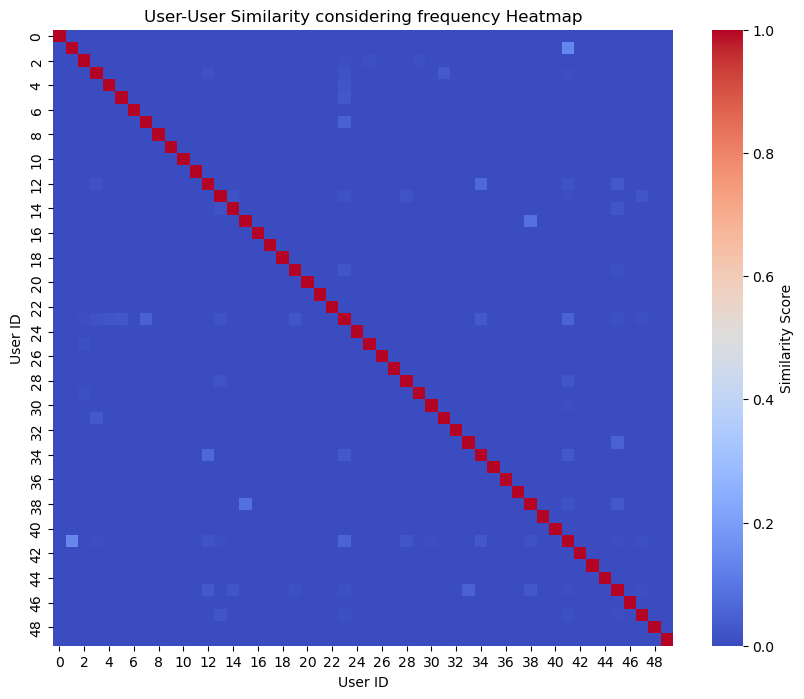

In [36]:
plot_similarity_heatmap(user_similarity2, n_items=50, title="User-User Similarity considering frequency Heatmap",x_label='User ID',y_label='User ID')

In [37]:
user_based_predictions2 = user_based_predict(full_data_matrix2, user_similarity2)
print("Predicted Interaction Matrix using User-to-User Similarity considering frequency")
print(user_based_predictions2)
print("Predicted Interaction Matrix shape:", user_based_predictions2.shape)

Predicted Interaction Matrix using User-to-User Similarity considering frequency
[[0.13107405 0.16303224 0.12982504 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.01243528 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Predicted Interaction Matrix shape: (7838, 15291)


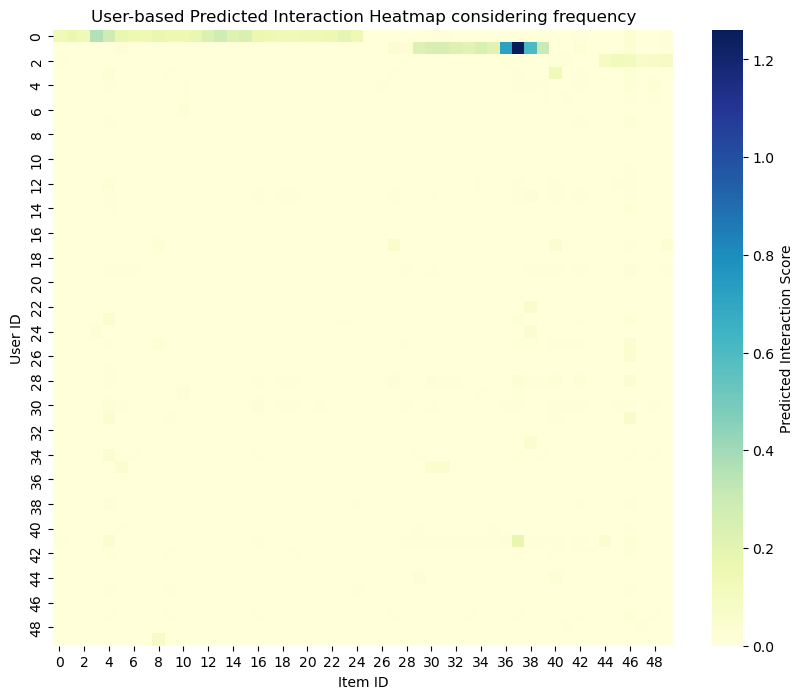

In [38]:
plot_interaction_prediction_heatmap(user_based_predictions2, title="User-based Predicted Interaction Heatmap considering frequency", num_users=50,num_items=50)

### Let's evaluate the model with these matrices

In [39]:
precision_user_k2, recall_user_k2,map_user_k2 = precision_recall_at_k(user_based_predictions2, test_data_matrix, k=10)
print('User-based CF Precision@K for k=10:', precision_user_k2)
print('User-based CF Recall@K for k=10:', recall_user_k2)
print('User-based CF MAP@K for k=10:', map_user_k2)

User-based CF Precision@K for k=10: 0.16210768053074526
User-based CF Recall@K for k=10: 0.8745431828569113
User-based CF MAP@K for k=10: 0.04623295341782079


### Dataframe with improved recommendations

In [40]:
recommendations_df2 = create_recommendations_csv(user_based_predictions2, name='user_based_recommendations2.csv')
recommendations_df2.head()

Recommendations CSV created successfully.


,user_id,recommendation
0,0,3 4 13 15 12 14 23 11 8 5
1,1,37 36 38 39 30 31 34 1806 29 32
2,2,53 58 3055 14578 92 81 15228 91 8999 13912
3,3,132 10475 118 161 117 149 146 169 163 10476
4,4,195 203 202 198 207 205 193 199 191 201


### Recommendations for a specific user

In [41]:
import random
# Pick a user at random
user_id = random.choice(range(user_based_predictions2.shape[0]))
print("Selected User ID:", user_id)

# Get top-10 recommendations for the selected user
top_10 = np.argsort(user_based_predictions2[user_id, :])[-10:][::-1]

display(top_10)

Selected User ID: 7141


array([2375, 2371, 1320, 1779, 6362, 1319, 6361, 1778, 4060, 9192])

In [42]:
top_10_df = pd.DataFrame({'i':top_10})

In [43]:
df = top_10_df.merge(items_df[['i', 'Title', 'ISBN Valid']], left_on='i', right_on='i')
display(df)

,i,Title,ISBN Valid
0,2375,CPP : Code de procédure pénale /,9783719037963; 3719037967
1,2371,CP : Code pénal /,9783719037901; 3719037908; 9783719038304; 3719...
2,1320,Code de droit international privé suisse annot...,2601031298; 9782601031294
3,1779,Edition annotée de la loi fédérale sur la pour...,9783727297946; 3727297948
4,6362,Le contrat de travail : code des obligations (...,9782940394234; 2940394237
5,1319,Droit de la famille : code annoté : mariage - ...,9782940394319; 2940394318
6,6361,Code suisse de la circulation routière : comme...,9783719029715; 3719029719
7,1778,Droit pénal accessoire : code annoté de la jur...,9782940394333; 2940394334
8,4060,Commentaire de la LTF /,9783727235283; 3727235284
9,9192,LP/CPC : Loi sur la poursuite pour dettes et l...,9783725585359; 3725585350


## Improving similarity with book information

In [44]:
items_df.isna().sum()

Title            0
Author         786
ISBN Valid     723
Publisher       23
Subjects      1591
i                0
Synopsis      7873
dtype: int64

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create one column with all the text data
#items_df['content'] = items_df['Title'].fillna('') + ' ' + items_df['Subjects'].fillna('') + ' ' + items_df['Author'].fillna('')
#items_df['content'] = items_df['Title'].fillna('') + ' ' + items_df['Subjects'].fillna('') + ' ' + items_df['Author'].fillna('') + ' ' + items_df['Publisher'].fillna('')
#items_df['content'] = items_df['Title'].fillna('') + ' ' + items_df['Author'].fillna('') + ' ' + items_df['Publisher'].fillna('')
items_df['content'] = items_df['Title'].fillna('') + ' ' + items_df['Subjects'].fillna('') + ' ' + items_df['Author'].fillna('') + ' ' + items_df['Publisher'].fillna('') + items_df['Synopsis'].fillna('')

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words=None)
tfidf_matrix = tfidf.fit_transform(items_df['content'])

print(tfidf_matrix.shape)

(15291, 83074)


In [46]:
content_similarity = cosine_similarity(tfidf_matrix)
print(content_similarity)
print(content_similarity.shape)

[[1.         0.         0.00273559 ... 0.         0.         0.0023368 ]
 [0.         1.         0.12065076 ... 0.         0.04220057 0.03449119]
 [0.00273559 0.12065076 1.         ... 0.         0.04018978 0.06999228]
 ...
 [0.         0.         0.         ... 1.         0.01780166 0.        ]
 [0.         0.04220057 0.04018978 ... 0.01780166 1.         0.01173919]
 [0.0023368  0.03449119 0.06999228 ... 0.         0.01173919 1.        ]]
(15291, 15291)


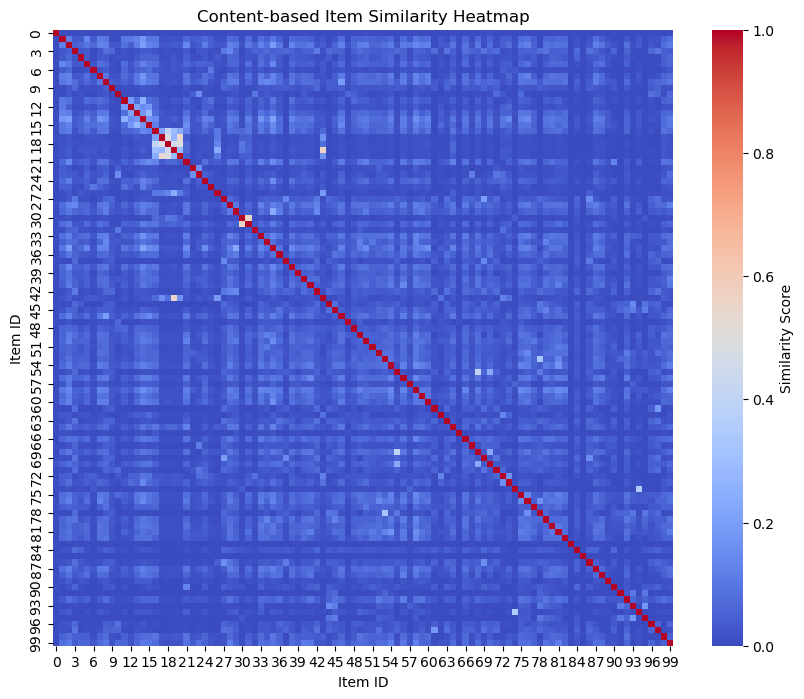

In [47]:
plot_similarity_heatmap(content_similarity, n_items=100, title="Content-based Item Similarity Heatmap",x_label='Item ID',y_label='Item ID')

In [48]:
items_df[(items_df['i']==53) | (items_df['i']==78)]

,Title,Author,ISBN Valid,Publisher,Subjects,i,Synopsis,content
53,Fullmetal alchemist /,"Arakawa, Hiromu, 1973-",9782351420171; 2351420179; 9782351420188; 2351...,Kurokawa,Shônen; Mangas; Bandes dessinées,53,"En voulant ressusciter leur mère, Edward et Al...",Fullmetal alchemist / Shônen; Mangas; Bandes d...
78,Fullmetal alchemist /,"Arakawa, Hiromu, 1973-",9782351427552; 2351427556; 9782351427521; 2351...,Kurokawa,Bandes dessinées; Mangas,78,NaN,Fullmetal alchemist / Bandes dessinées; Mangas...


In [49]:
content_similarity[53, 78]

0.3308337381515463

In [50]:
content_based_predictions = item_based_predict(full_data_matrix, content_similarity)
print("Predicted Interaction Matrix using Content-based Similarity")
print(content_based_predictions)

Predicted Interaction Matrix using Content-based Similarity
[[2.33138053e-02 3.87644632e-03 2.82174752e-03 ... 0.00000000e+00
  2.23471984e-03 2.22485223e-03]
 [1.20771873e-04 8.15779474e-04 9.93187149e-04 ... 0.00000000e+00
  1.18122337e-03 7.42649478e-04]
 [1.72953642e-03 2.88877792e-03 3.10952569e-03 ... 3.00996717e-02
  5.54779133e-03 2.99737299e-03]
 ...
 [1.36096904e-05 1.53014795e-04 1.52646746e-04 ... 2.32986397e-03
  3.12328341e-04 9.69787405e-05]
 [0.00000000e+00 3.81841830e-05 3.68190512e-05 ... 2.41964961e-03
  1.52162408e-04 1.99628765e-05]
 [0.00000000e+00 1.00014399e-04 1.34791655e-04 ... 0.00000000e+00
  2.63633390e-04 1.54115256e-04]]


In [51]:
precision_content_k, recall_content_k, map_content_k = precision_recall_at_k(content_based_predictions, test_data_matrix, k=10)
print('Content-based CF Precision@K for k=10:', precision_content_k)   
print('Content-based CF Recall@K for k=10:', recall_content_k)
print('Content-based CF MAP@K for k=10:', map_content_k)

Content-based CF Precision@K for k=10: 0.07389640214341003
Content-based CF Recall@K for k=10: 0.4401495670848683
Content-based CF MAP@K for k=10: 0.0189620418636112


In [52]:
content_based_predictions_df = create_recommendations_csv(content_based_predictions, name='content_based_recommendations.csv')

Recommendations CSV created successfully.


## Heatmap

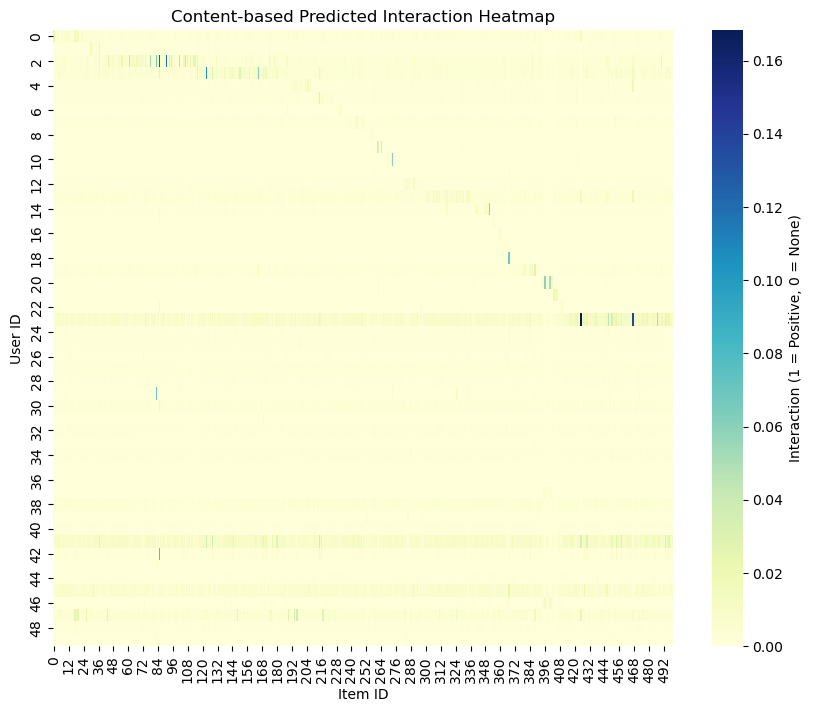

In [53]:
plot_interaction_heatmap1(content_based_predictions, n_users=50, n_items=500, title="Content-based Predicted Interaction Heatmap")

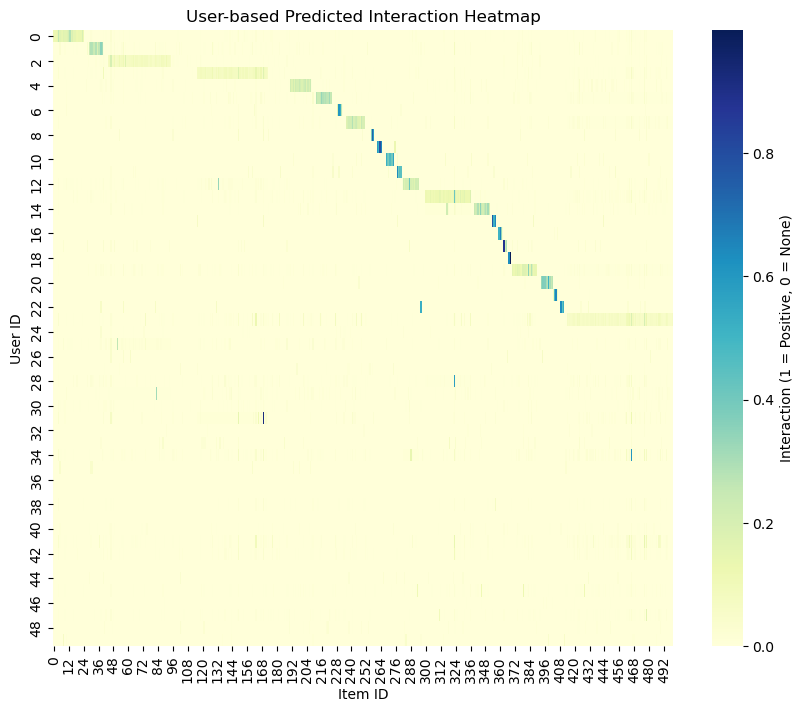

In [54]:
plot_interaction_heatmap1(user_based_predictions, n_users=50, n_items=500, title="User-based Predicted Interaction Heatmap")

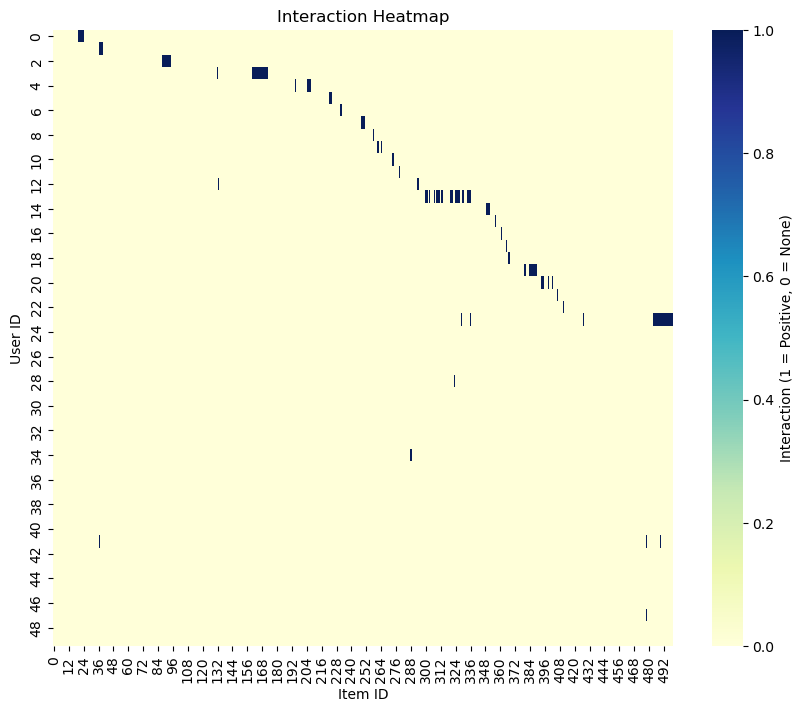

In [55]:
plot_interaction_heatmap1(test_data_matrix,50,500)

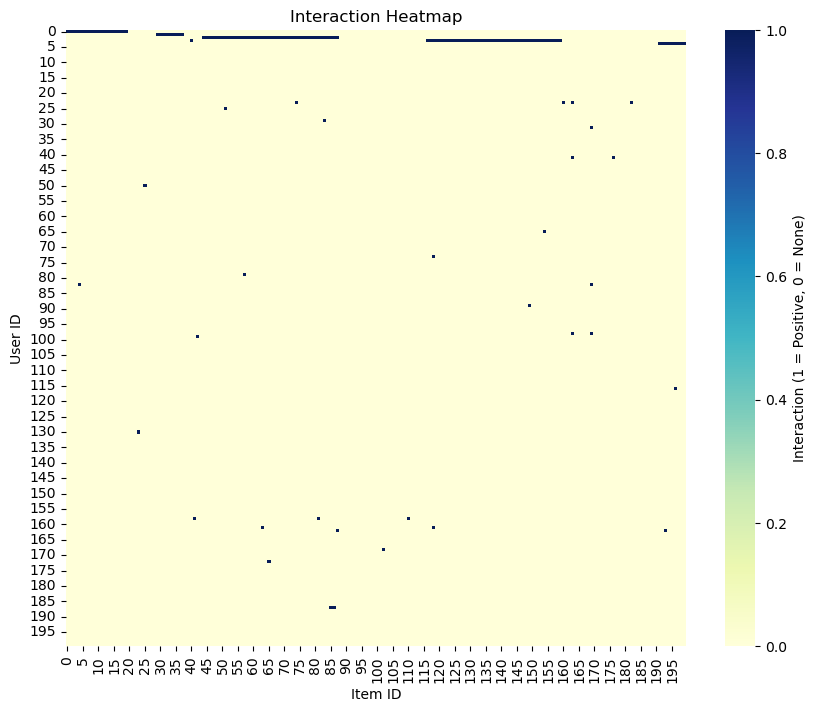

In [56]:
plot_interaction_heatmap1(train_data_matrix,200,200)


## Hybrid: item & user similarities combined

In [57]:
ground_truth_df = test_data.groupby('user_id')['i'].apply(list).reset_index()
ground_truth_df.rename(columns={'i': 'actual_books_viewed'}, inplace=True)
ground_truth_df

,user_id,actual_books_viewed
0,0,"[20, 21, 22, 23, 24]"
1,1,"[37, 38, 38, 39]"
2,2,"[88, 89, 90, 91, 91, 91, 91, 92, 92, 92, 93, 9..."
3,3,"[160, 161, 161, 162, 163, 164, 165, 166, 167, ..."
4,4,"[205, 206, 207, 195]"
...,...,...
7833,7833,[7760]
7834,7834,"[1367, 1367]"
7835,7835,[6791]
7836,7836,[3471]


### Graph to find the best weight

In [58]:
'''
weights = np.arange(0, 1.05, 0.1)  # from 0 to 1, step 0.1
precisions = []

for w in weights:
    hybrid_pred = user_based_predictions2 * w + content_based_predictions * (1 - w)
    precision, _, _ = precision_recall_at_k(hybrid_pred, test_data_matrix, k=10)
    precisions.append(precision)

plt.figure(figsize=(8, 6))
plt.plot(weights, precisions, marker='o', label='Precision@10')
plt.xlabel('User-based Weight')
plt.ylabel('Precision@10')
plt.title('Precision@10 vs User-based Weight in Hybrid Model')
plt.legend()
plt.grid(True)
plt.show()
'''

"\nweights = np.arange(0, 1.05, 0.1)  # from 0 to 1, step 0.1\nprecisions = []\n\nfor w in weights:\n    hybrid_pred = user_based_predictions2 * w + content_based_predictions * (1 - w)\n    precision, _, _ = precision_recall_at_k(hybrid_pred, test_data_matrix, k=10)\n    precisions.append(precision)\n\nplt.figure(figsize=(8, 6))\nplt.plot(weights, precisions, marker='o', label='Precision@10')\nplt.xlabel('User-based Weight')\nplt.ylabel('Precision@10')\nplt.title('Precision@10 vs User-based Weight in Hybrid Model')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

### Hybrid recommendation with user & content

In [59]:
hybrid_predictions1 = user_based_predictions2*0.2 + content_based_predictions*0.8
print(precision_recall_at_k(hybrid_predictions1, test_data_matrix, k=10))

(0.1635748915539653, 0.8816036509335375, 0.04667454444565835)


In [60]:
hybrid_recommendations_df1 = create_recommendations_csv(hybrid_predictions1, name='hybrid_recommendation1.csv')

Recommendations CSV created successfully.


### Graph to find the best weight

In [61]:
'''
weights = np.arange(0, 1.05, 0.1)  # from 0 to 1, step 0.1
precisions = []

for w in weights:
    hybrid_pred = user_based_predictions2 * w + item_based_predictions * (1 - w)
    precision, _, _ = precision_recall_at_k(hybrid_pred, test_data_matrix, k=10)
    precisions.append(precision)

plt.figure(figsize=(8, 6))
plt.plot(weights, precisions, marker='o', label='Precision@10')
plt.xlabel('User-based Weight')
plt.ylabel('Precision@10')
plt.title('Precision@10 vs User-based Weight in Hybrid Model')
plt.legend()
plt.grid(True)
plt.show()
'''

"\nweights = np.arange(0, 1.05, 0.1)  # from 0 to 1, step 0.1\nprecisions = []\n\nfor w in weights:\n    hybrid_pred = user_based_predictions2 * w + item_based_predictions * (1 - w)\n    precision, _, _ = precision_recall_at_k(hybrid_pred, test_data_matrix, k=10)\n    precisions.append(precision)\n\nplt.figure(figsize=(8, 6))\nplt.plot(weights, precisions, marker='o', label='Precision@10')\nplt.xlabel('User-based Weight')\nplt.ylabel('Precision@10')\nplt.title('Precision@10 vs User-based Weight in Hybrid Model')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

### Hybrid recommendations with user & item

In [62]:
hybrid_predictions2 = user_based_predictions*0.4 + item_based_predictions*0.6 
print(precision_recall_at_k(hybrid_predictions2, test_data_matrix, k=10))

(0.16991579484561956, 0.9109070248623674, 0.04943480479714126)


In [63]:
hybrid_recommendations_df2 = create_recommendations_csv(hybrid_predictions2, name='hybrid_recommendation2.csv')

Recommendations CSV created successfully.


### Graph to find the best weight

In [64]:
'''
weight_range = np.arange(0, 1.01, 0.1)
precisions = []
weights_list = []

for w1 in weight_range:
    for w2 in weight_range:
        w3 = 1.0 - w1 - w2
        if w3 < 0 or w3 > 1:
            continue
        hybrid_pred = user_based_predictions2 * w1 + item_based_predictions * w2 + content_based_predictions * w3
        precision, _, _ = precision_recall_at_k(hybrid_pred, test_data_matrix, k=10)
        precisions.append(precision)
        weights_list.append((w1, w2, w3))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(len(precisions)), precisions, marker='o')
plt.xlabel('Weight Combination Index')
plt.ylabel('Precision@10')
plt.title('Precision@10 for Different Hybrid Weights')
plt.grid(True)
plt.show()

# Print the best weights
best_idx = np.argmax(precisions)
best_weights = weights_list[best_idx]
print(f'Best Precision@10: {precisions[best_idx]:.4f} at weights user={best_weights[0]:.2f}, item={best_weights[1]:.2f}, content={best_weights[2]:.2f}')
'''

"\nweight_range = np.arange(0, 1.01, 0.1)\nprecisions = []\nweights_list = []\n\nfor w1 in weight_range:\n    for w2 in weight_range:\n        w3 = 1.0 - w1 - w2\n        if w3 < 0 or w3 > 1:\n            continue\n        hybrid_pred = user_based_predictions2 * w1 + item_based_predictions * w2 + content_based_predictions * w3\n        precision, _, _ = precision_recall_at_k(hybrid_pred, test_data_matrix, k=10)\n        precisions.append(precision)\n        weights_list.append((w1, w2, w3))\n\n# Plot\nplt.figure(figsize=(10, 5))\nplt.plot(range(len(precisions)), precisions, marker='o')\nplt.xlabel('Weight Combination Index')\nplt.ylabel('Precision@10')\nplt.title('Precision@10 for Different Hybrid Weights')\nplt.grid(True)\nplt.show()\n\n# Print the best weights\nbest_idx = np.argmax(precisions)\nbest_weights = weights_list[best_idx]\nprint(f'Best Precision@10: {precisions[best_idx]:.4f} at weights user={best_weights[0]:.2f}, item={best_weights[1]:.2f}, content={best_weights[2]:.2f}')\

### Hybrid recommendation with user, item & content

In [65]:
hybrid_predictions3 = user_based_predictions2*0.2 + item_based_predictions*0.2 + content_based_predictions*0.6
print(precision_recall_at_k(hybrid_predictions3, test_data_matrix, k=10))

(0.17080887981627446, 0.9094717248719759, 0.04962743573230834)


In [66]:
hybrid_recommendations_df3 = create_recommendations_csv(hybrid_predictions3, name='hybrid_recommendation3.csv')

Recommendations CSV created successfully.


## Text embeddings

In [69]:
from sentence_transformers import SentenceTransformer

/Users/zeliadecaillet/anaconda3/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [70]:
sentence_model = SentenceTransformer("all-mpnet-base-v2")

# Combine relevant text fields for richer embeddings
items_df['content'] = (
    items_df['Title'].fillna('') + ' ' +
    items_df['Subjects'].fillna('') + ' ' +
    items_df['Author'].fillna('') 
    + ' ' + items_df['Publisher'].fillna('') 
    #+ ' ' + items_df['Synopsis'].fillna('')
)

# Generate embeddings for all items
items_df['embedding'] = list(sentence_model.encode(items_df['content'].tolist(), show_progress_bar=True))

Batches:   0%|          | 0/478 [00:00<?, ?it/s]

In [71]:
embeddings_matrix = np.vstack(items_df['embedding'].values)
item_embedding_similarity = cosine_similarity(embeddings_matrix, embeddings_matrix)
print(item_embedding_similarity)

[[1.         0.15151511 0.1307109  ... 0.11432153 0.16508037 0.17863786]
 [0.15151511 1.0000001  0.38859704 ... 0.1582081  0.06512423 0.3302444 ]
 [0.1307109  0.38859704 0.99999976 ... 0.14526115 0.18115    0.16155526]
 ...
 [0.11432153 0.1582081  0.14526115 ... 0.9999999  0.43324894 0.14977127]
 [0.16508037 0.06512423 0.18115    ... 0.43324894 1.0000001  0.00547265]
 [0.17863786 0.3302444  0.16155526 ... 0.14977127 0.00547265 1.0000001 ]]


In [72]:
embedding_based_predictions = item_based_predict(full_data_matrix, item_embedding_similarity)

In [73]:
precision, recall, map_k = precision_recall_at_k(embedding_based_predictions, test_data_matrix, k=10)
print(f"Embedding-based Precision@10: {precision:.4f}, Recall@10: {recall:.4f}, MAP@10: {map_k:.4f}")

Embedding-based Precision@10: 0.0410, Recall@10: 0.2933, MAP@10: 0.0106


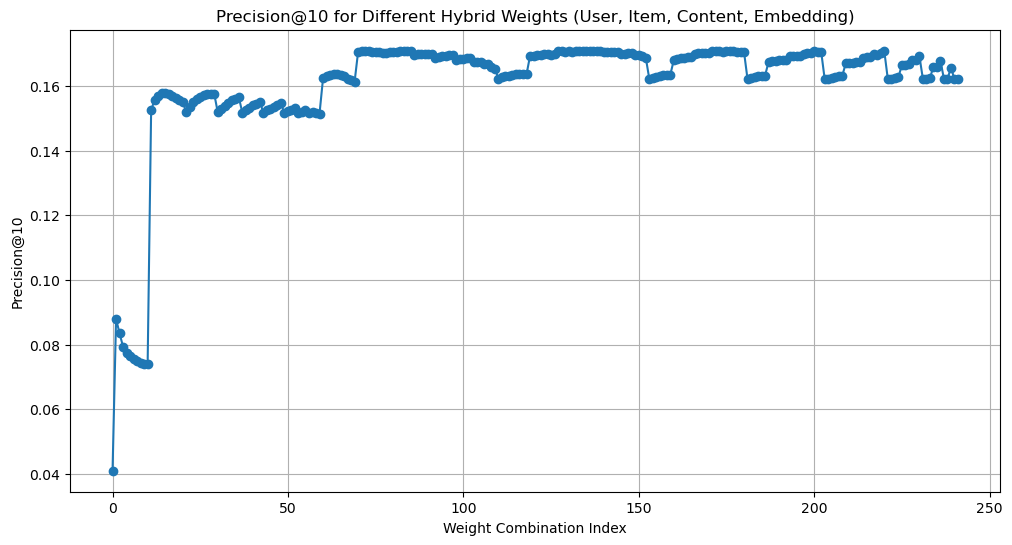

Best Precision@10: 0.1709 at weights user=0.10, item=0.20, content=0.40, embedding=0.30


In [ ]:
'''
weight_range = np.arange(0, 1.05, 0.1)
best_precision = 0
best_weights = (0, 0, 0, 0)
precisions = []
weights_list = []

for w1 in weight_range:
    for w2 in weight_range:
        for w3 in weight_range:
            w4 = 1.0 - w1 - w2 - w3
            if w4 < 0 or w4 > 1:
                continue
            # Hybrid prediction: user, item, content, embedding
            hybrid_pred = (
                user_based_predictions2 * w1 +
                item_based_predictions * w2 +
                content_based_predictions * w3 +
                embedding_based_predictions * w4
            )
            precision, _, _ = precision_recall_at_k(hybrid_pred, test_data_matrix, k=10)
            precisions.append(precision)
            weights_list.append((w1, w2, w3, w4))
            if precision > best_precision:
                best_precision = precision
                best_weights = (w1, w2, w3, w4)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(precisions)), precisions, marker='o')
plt.xlabel('Weight Combination Index')
plt.ylabel('Precision@10')
plt.title('Precision@10 for Different Hybrid Weights (User, Item, Content, Embedding)')
plt.grid(True)
plt.show()

print(f'Best Precision@10: {best_precision:.4f} at weights user={best_weights[0]:.2f}, item={best_weights[1]:.2f}, content={best_weights[2]:.2f}, embedding={best_weights[3]:.2f}')
'''

In [93]:
hybrid_predictions4 = user_based_predictions2*0.1 + item_based_predictions * 0.2 + content_based_predictions * 0.4 + embedding_based_predictions*0.3
print(precision_recall_at_k(hybrid_predictions4, test_data_matrix, k=10))

(0.17063026282214327, 0.9093832348361507, 0.050013188698120034)


In [94]:
hybrid_recommendations_df4 = create_recommendations_csv(hybrid_predictions4, name='hybrid_recommendation4.csv')

Recommendations CSV created successfully.


## Text embedding

In [77]:
#pip install transformers torch

In [78]:
'''
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_text_embedding(text):
    # Tokenize the text and get the BERT token IDs
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    
    # Get the embeddings from BERT model
    with torch.no_grad():
        outputs = model(**inputs)
    
    # The embeddings of the [CLS] token are usually used to represent the entire sequence
    return outputs.last_hidden_state[:, 0, :].numpy()

# Example: Create embeddings for the first 5 books
embeddings = []
for content in items_df['content']:
    embeddings.append(get_text_embedding(content))

# Convert to a numpy array
embeddings = np.vstack(embeddings)

print(embeddings.shape)  
print(embeddings)
'''

'\nfrom transformers import BertTokenizer, BertModel\nimport torch\n\n# Load pre-trained BERT model and tokenizer\ntokenizer = BertTokenizer.from_pretrained(\'bert-base-uncased\')\nmodel = BertModel.from_pretrained(\'bert-base-uncased\')\n\ndef get_text_embedding(text):\n    # Tokenize the text and get the BERT token IDs\n    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)\n    \n    # Get the embeddings from BERT model\n    with torch.no_grad():\n        outputs = model(**inputs)\n    \n    # The embeddings of the [CLS] token are usually used to represent the entire sequence\n    return outputs.last_hidden_state[:, 0, :].numpy()\n\n# Example: Create embeddings for the first 5 books\nembeddings = []\nfor content in items_df[\'content\']:\n    embeddings.append(get_text_embedding(content))\n\n# Convert to a numpy array\nembeddings = np.vstack(embeddings)\n\nprint(embeddings.shape)  \nprint(embeddings)\n'

In [79]:
#embeddings_similarity = cosine_similarity(embeddings)
#print(embeddings_similarity)

In [80]:
#plot_similarity_heatmap(embeddings_similarity, n_items=100, title="BERT-based Content Similarity Heatmap",x_label='Item ID',y_label='Item ID')

In [81]:
#embeddings_content_based_predictions = item_based_predict(full_data_matrix, embeddings_similarity)
#print("Predicted Interaction Matrix using BERT-based Content Similarity")
#print(embeddings_content_based_predictions)

In [82]:
#print(precision_recall_at_k(embeddings_content_based_predictions, test_data_matrix, k=10))

### Text embedding 2

In [83]:
'''
from sentence_transformers import SentenceTransformer
import numpy as np

# Load the pre-trained Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Example: Assuming 'items_df' contains metadata like 'title' or 'description' of items (books)
# Get embeddings for book descriptions or titles (you can choose whichever you prefer)
item_descriptions = items_df['content'].tolist()

# Generate embeddings for the items
item_embeddings = model.encode(item_descriptions, show_progress_bar=True)

# Check the shape of the embeddings (should be num_items x embedding_dim, e.g., (10000, 384))
print(item_embeddings.shape)
'''


"\nfrom sentence_transformers import SentenceTransformer\nimport numpy as np\n\n# Load the pre-trained Sentence-BERT model\nmodel = SentenceTransformer('paraphrase-MiniLM-L6-v2')\n\n# Example: Assuming 'items_df' contains metadata like 'title' or 'description' of items (books)\n# Get embeddings for book descriptions or titles (you can choose whichever you prefer)\nitem_descriptions = items_df['content'].tolist()\n\n# Generate embeddings for the items\nitem_embeddings = model.encode(item_descriptions, show_progress_bar=True)\n\n# Check the shape of the embeddings (should be num_items x embedding_dim, e.g., (10000, 384))\nprint(item_embeddings.shape)\n"

In [84]:
embeddings_similarity = cosine_similarity(item_embeddings)

NameError: name 'item_embeddings' is not defined

In [ ]:
hybrid_similarity = item_similarity*0.75 + embeddings_similarity*0.25

In [ ]:
hybrid_predictions_embedding = item_based_predict(train_data_matrix,hybrid_similarity)
#print("Predicted Interaction Matrix using Sentence-BERT-based Content Similarity")
#print(embeddings_content_based_predictions)
print(precision_recall_at_k(hybrid_predictions_embedding, test_data_matrix, k=10))

(0.05687675427405247, 0.28608620302040466, 0.016562493671450237)


In [ ]:
hybrid_predictions_embedding = item_based_predict(train_data_matrix,hybrid_similarity)
#print("Predicted Interaction Matrix using Sentence-BERT-based Content Similarity")
#print(embeddings_content_based_predictions)
print(precision_recall_at_k(hybrid_predictions_embedding, test_data_matrix, k=10))

(0.05697882112784166, 0.2854863654663948, 0.016471484060154834)


In [ ]:
hybrid_predictions_embedding = item_based_predict(train_data_matrix,hybrid_similarity)
#print("Predicted Interaction Matrix using Sentence-BERT-based Content Similarity")
#print(embeddings_content_based_predictions)
print(precision_recall_at_k(hybrid_predictions_embedding, test_data_matrix, k=10))

(0.05664710385302671, 0.28583693282455325, 0.016544206693479648)


In [ ]:
embeddings_content_based_predictions = item_based_predict(train_data_matrix, embeddings_similarity)
#print("Predicted Interaction Matrix using Sentence-BERT-based Content Similarity")
#print(embeddings_content_based_predictions)
print(precision_recall_at_k(embeddings_content_based_predictions, test_data_matrix, k=10))

(0.01935442714978261, 0.13072690421377547, 0.005484893498098435)


## NCF

In [ ]:
pip install recommenders

python(18635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 5.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 19.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.9 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 19.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install tensorflow

python(18743) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached numpy-1.26.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 2.8 MB/s eta 0:00:0000:0100:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 5.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 3.6 MB/s eta 0:00:0000:0100:01
Using cached numpy-1.26.4-cp311-cp311-macosx_10_9_x86_64.whl (20.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 5.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 5.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3

In [ ]:
pip install tf_slim

python(18812) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install logging

python(18821) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [24 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 14, in <module>
        File "/Users/nadegelan/MGT-502/.conda/lib/python3.11/site-packages/setuptools/__init__.py", line 22, in <module>
          import _distutils_hack.override  # noqa: F401
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/nadegelan/MGT-502/.conda/lib/python3.11/site-packages/_distutils_hack/override.py", line 1, in <module>
          __import__('_distutils_hack').do_override()
        File "/Users/nadegelan/MGT-502/.conda/lib/python3.11/site-packages/_distutils_hack/__init__.py", line 89, in do_override
          ensure_local_distutils()
        File "/Users/nadegelan/MGT-502/.conda/lib/python3.11/site-packages/_distutils_hack/__init__.py", line

In [ ]:
'''from recommenders.models.ncf.ncf_singlenode import NCF
from recommenders.models.ncf.dataset import Dataset as NCFDataset
from recommenders.datasets.python_splitters import python_chrono_split
from recommenders.utils.constants import SEED as DEFAULT_SEED

# Initial parameters
TOP_K = 10
EPOCHS = 50
BATCH_SIZE = 1024
SEED = DEFAULT_SEED


data = NCFDataset(train = train_data_matrix, test = test_data_matrix, seed=SEED)

model = NCF (
    n_users=data.n_users, 
    n_items=data.n_items,
    model_type="NeuMF",
    n_factors=4,
    layer_sizes=[16,8,4],
    n_epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=1e-3,
    verbose=1,
    seed=SEED
)

# fitting the model
model.fit(data)

# predict the data in the test set
predictions = [[row.userID, row.itemID, model.predict(row.userID, row.itemID)]
               for (_, row) in test_data_matrix.iterrows()]'''

TypeError: Dataset.__init__() got an unexpected keyword argument 'train'